<h1 style="text-align: center;">DATA CLEANING</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flipkart_refrigerator.csv')
df.head()

,Product_Name,Capacity,Category,Star_Ratings,Price,Discount,Rating,Unnamed: 7
0,Whirlpool,270 L,Triple Door,NaN,"₹ 28,490",25% off,4.3,NaN
1,LG,343 L,Double Door,3 Star,"₹ 41,990",23% off,4.3,NaN
2,Whirlpool,235 L,Triple Door,NaN,"₹ 25,990",29% off,4.5,NaN
3,LG,242 L,Double Door,3 Star,"₹ 69,990",29% off,4.4,NaN
4,Haier,596 L,Side by Side,NaN,"₹ 21,990",42% off,4.5,NaN


In [2]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (903, 8)


In [3]:
df.describe()

,Rating,Unnamed: 7
count,903.000000,0.0
mean,4.302215,NaN
std,0.118638,NaN
min,4.000000,NaN
25%,4.300000,NaN
50%,4.300000,NaN
75%,4.400000,NaN
max,4.500000,NaN


In [4]:
df['Star_Ratings'] = df['Star_Ratings'].replace('N/A', pd.NA)

df.loc[(df['Category'] == 'Side by Side') & (df['Star_Ratings'].isna()), 'Star_Ratings'] = '3 Star'
df.loc[(df['Category'] == 'Triple Door') & (df['Star_Ratings'].isna()), 'Star_Ratings'] = '4 Star'

print(df.isnull().sum())

Product_Name      0
Capacity          0
Category          0
Star_Ratings      0
Price             0
Discount          0
Rating            0
Unnamed: 7      903
dtype: int64


In [5]:
df

,Product_Name,Capacity,Category,Star_Ratings,Price,Discount,Rating,Unnamed: 7
0,Whirlpool,270 L,Triple Door,4 Star,"₹ 28,490",25% off,4.3,NaN
1,LG,343 L,Double Door,3 Star,"₹ 41,990",23% off,4.3,NaN
2,Whirlpool,235 L,Triple Door,4 Star,"₹ 25,990",29% off,4.5,NaN
3,LG,242 L,Double Door,3 Star,"₹ 69,990",29% off,4.4,NaN
4,Haier,596 L,Side by Side,3 Star,"₹ 21,990",42% off,4.5,NaN
...,...,...,...,...,...,...,...,...
898,Whirlpool,235 L,Double Door,2 Star,"₹ 14,299",26% off,4.3,NaN
899,LG,272 L,Double Door,3 Star,"₹ 14,290",25% off,4.1,NaN
900,Whirlpool,235 L,Double Door,3 Star,"₹ 14,290",21% off,4.3,NaN
901,Godrej,272 L,Double Door,3 Star,"₹ 14,290",29% off,4.3,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  903 non-null    object 
 1   Capacity      903 non-null    object 
 2   Category      903 non-null    object 
 3   Star_Ratings  903 non-null    object 
 4   Price         903 non-null    object 
 5   Discount      903 non-null    object 
 6   Rating        903 non-null    float64
 7   Unnamed: 7    0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 56.6+ KB


In [7]:
df = df.drop(columns=['Unnamed: 7'])

In [8]:
df.head(0)

,Product_Name,Capacity,Category,Star_Ratings,Price,Discount,Rating


In [9]:
duplicate_counts = {col: df[col].duplicated().sum() for col in df.columns if df[col].duplicated().any()}
print("Duplicate counts per column:", duplicate_counts)

Duplicate counts per column: {'Product_Name': 897, 'Capacity': 882, 'Category': 899, 'Star_Ratings': 899, 'Price': 481, 'Discount': 885, 'Rating': 897}


In [10]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 6


In [11]:
df = df.drop_duplicates()

In [12]:
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [13]:
df['Price'] = df['Price'].replace('[₹,]', '', regex=True).astype(float)
df['Discount'] = df['Discount'].replace('[% off]', '', regex=True).astype(float)

In [14]:
df

,Product_Name,Capacity,Category,Star_Ratings,Price,Discount,Rating
0,Whirlpool,270 L,Triple Door,4 Star,28490.0,25.0,4.3
1,LG,343 L,Double Door,3 Star,41990.0,23.0,4.3
2,Whirlpool,235 L,Triple Door,4 Star,25990.0,29.0,4.5
3,LG,242 L,Double Door,3 Star,69990.0,29.0,4.4
4,Haier,596 L,Side by Side,3 Star,21990.0,42.0,4.5
...,...,...,...,...,...,...,...
898,Whirlpool,235 L,Double Door,2 Star,14299.0,26.0,4.3
899,LG,272 L,Double Door,3 Star,14290.0,25.0,4.1
900,Whirlpool,235 L,Double Door,3 Star,14290.0,21.0,4.3
901,Godrej,272 L,Double Door,3 Star,14290.0,29.0,4.3


In [15]:
df = df.to_csv('refridgerator_cleaned.csv', index=False)
print("Cleaned dataset saved as 'refridgerator_cleaned.csv'")

Cleaned dataset saved as 'refridgerator_cleaned.csv'


<h1 style="text-align: center;">EXPLORATORY DATA ANALYSIS</h1>

# Univariate AnaAnalysis

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("refridgerator_cleaned.csv")  # Ensure the file path is correct
print(df.head())  # Check the first few rows of the DataFrame

  Product_Name Capacity      Category Star_Ratings    Price  Discount  Rating
0    Whirlpool    270 L   Triple Door       4 Star  28490.0      25.0     4.3
1           LG    343 L   Double Door       3 Star  41990.0      23.0     4.3
2    Whirlpool    235 L   Triple Door       4 Star  25990.0      29.0     4.5
3           LG    242 L   Double Door       3 Star  69990.0      29.0     4.4
4        Haier    596 L  Side by Side       3 Star  21990.0      42.0     4.5


In [17]:
print(df.columns)  # Check if 'Price' is in the list of columns
print(df['Price'].head())  # Check the first few values of the 'Price' column

Index(['Product_Name', 'Capacity', 'Category', 'Star_Ratings', 'Price',
       'Discount', 'Rating'],
      dtype='object')
0    28490.0
1    41990.0
2    25990.0
3    69990.0
4    21990.0
Name: Price, dtype: float64


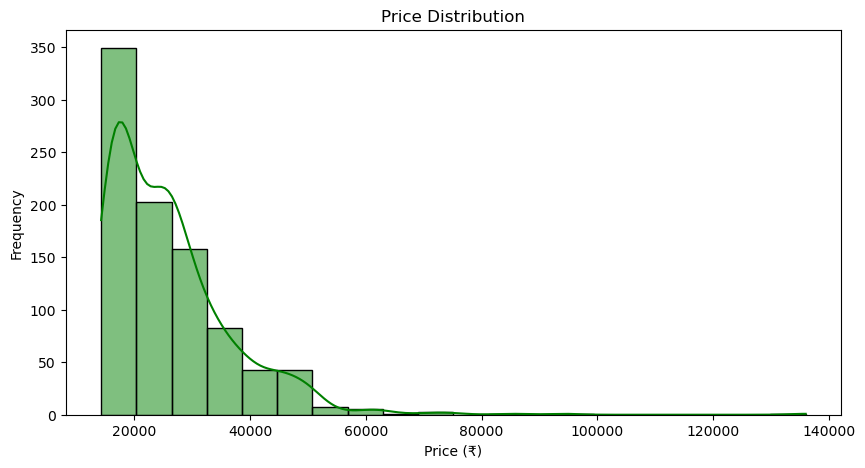

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=20, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

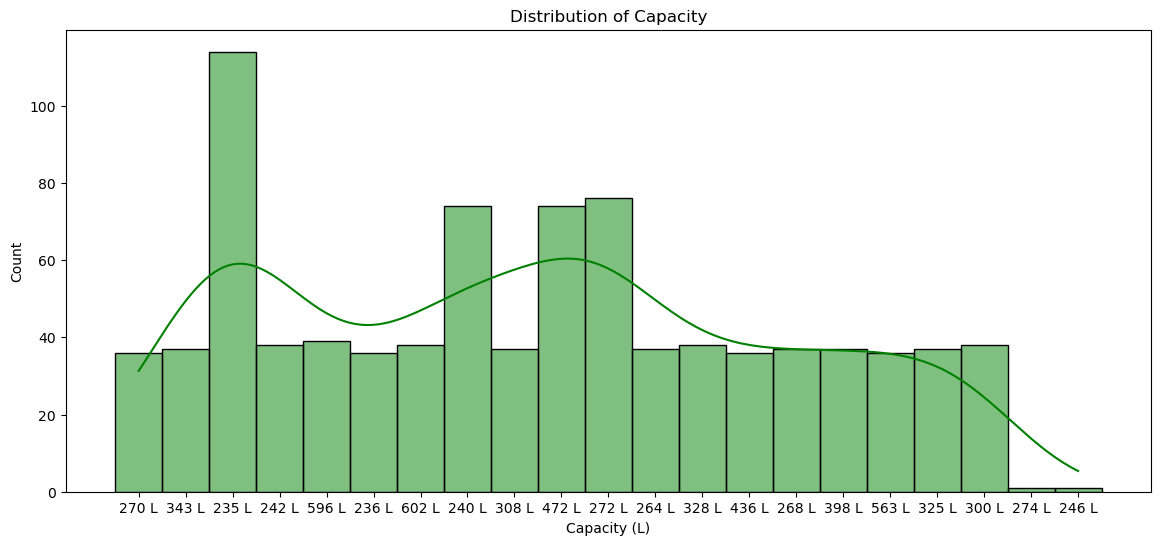

In [19]:
plt.figure(figsize=(14,6))
sns.histplot(df['Capacity'], bins=30, kde=True, color='green')
plt.title('Distribution of Capacity')
plt.xlabel('Capacity (L)')
plt.ylabel('Count')
plt.show()

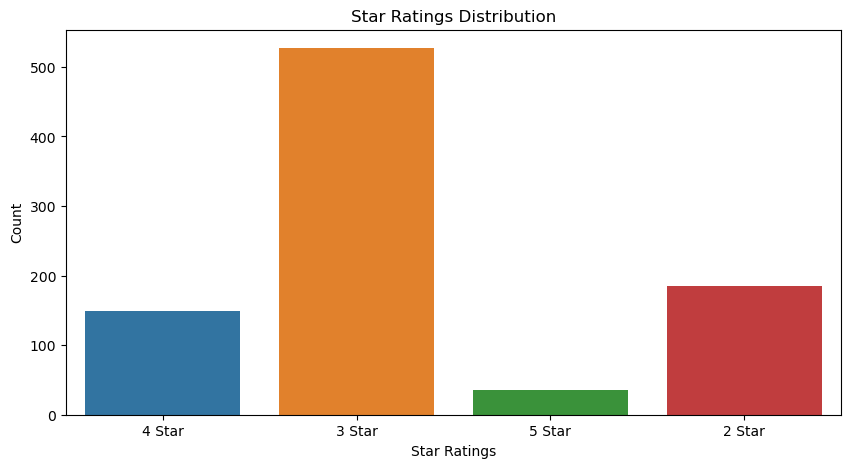

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Star_Ratings', palette='tab10')
plt.title('Star Ratings Distribution')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()

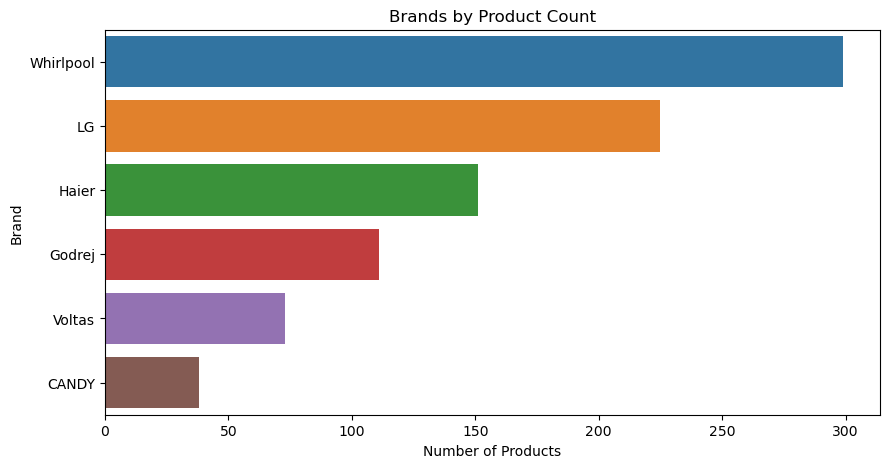

In [21]:
plt.figure(figsize=(10,5))
top_brands = df['Product_Name'].value_counts().head(6)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='tab10')
plt.title('Brands by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

# Bivariate Analysis

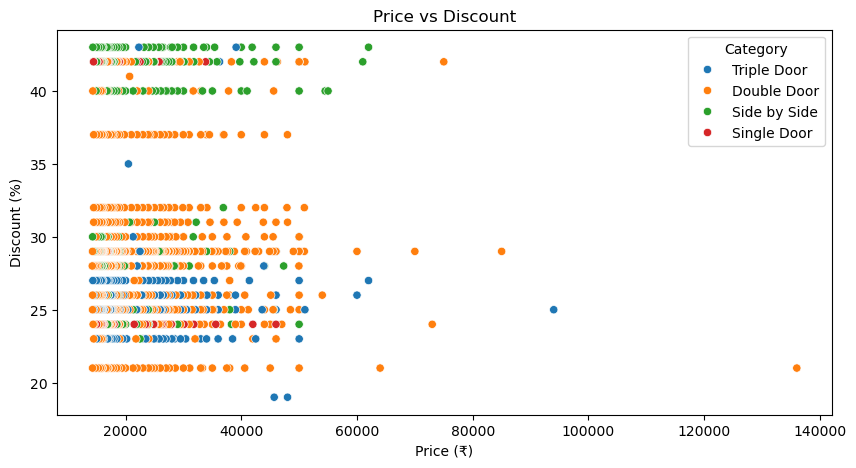

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Price', y='Discount', data=df, hue='Category', palette='tab10')
plt.title('Price vs Discount')
plt.xlabel('Price (₹)')
plt.ylabel('Discount (%)')
plt.show()

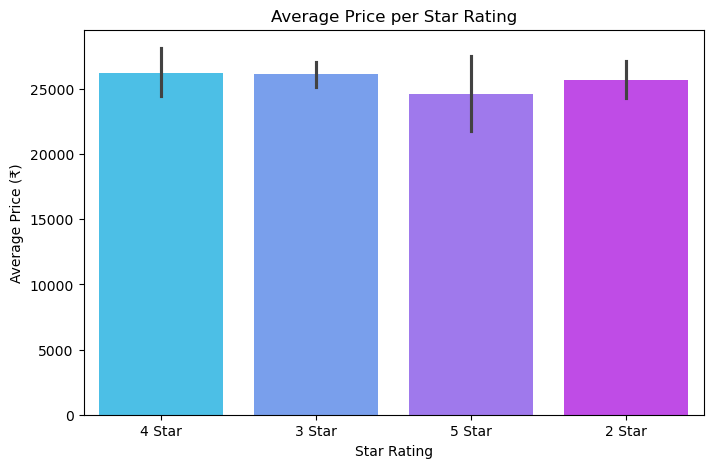

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Star_Ratings', y='Price', data=df, estimator='mean', palette='cool')
plt.title('Average Price per Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Price (₹)')
plt.show()

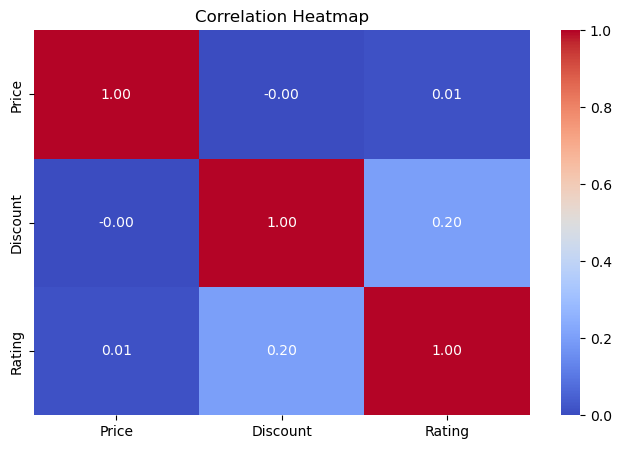

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
from tabulate import tabulate

# Top 5 Most Expensive Refrigerators
top_expensive = df.nlargest(5, 'Price')[['Product_Name', 'Price', 'Category', 'Rating']]
print("\n\nTop 2 Most Expensive Refrigerators:\n")
print(tabulate(top_expensive, headers='keys', tablefmt='pretty'))

# Top 5 Highly Rated Refrigerators
top_rated = df.nlargest(5, 'Rating')[['Product_Name', 'Rating', 'Category', 'Price']]
print("\n\nTop 2 Highly Rated Refrigerators:\n")
print(tabulate(top_rated, headers='keys', tablefmt='pretty'))



Top 2 Most Expensive Refrigerators:

+-----+--------------+----------+-------------+--------+
|     | Product_Name |  Price   |  Category   | Rating |
+-----+--------------+----------+-------------+--------+
| 109 |    Godrej    | 135999.0 | Double Door |  4.4   |
| 48  |  Whirlpool   | 93990.0  | Triple Door |  4.3   |
| 110 |      LG      | 84990.0  | Double Door |  4.3   |
| 46  |    Haier     | 74990.0  | Double Door |  4.4   |
| 68  |      LG      | 72990.0  | Double Door |  4.3   |
+-----+--------------+----------+-------------+--------+


Top 2 Highly Rated Refrigerators:

+----+--------------+--------+--------------+---------+
|    | Product_Name | Rating |   Category   |  Price  |
+----+--------------+--------+--------------+---------+
| 2  |  Whirlpool   |  4.5   | Triple Door  | 25990.0 |
| 4  |    Haier     |  4.5   | Side by Side | 21990.0 |
| 6  |    Haier     |  4.5   | Side by Side | 61990.0 |
| 25 |      LG      |  4.5   | Double Door  | 59990.0 |
| 28 |    Haier    

# The dataset reveals that the most expensive refrigerators belong to premium categories like Double Door and Side by Side, priced between ₹65,000 and ₹70,000. However, high customer ratings (4.8–4.9) are not necessarily tied to the most expensive models, as highly rated refrigerators also include mid-range options like Triple Door. This suggests that factors beyond price, such as features and brand reputation, significantly influence customer satisfaction.

<h1 style="text-align: center;">UNSUPERVISED LEARNING</h1>

In [26]:
import warnings
warnings.filterwarnings('ignore')
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Raghuln.2539",
    database="flipkart"
)
query = "SELECT * FROM refridgerator_cleaned;"
df = pd.read_sql(query, conn)

conn.close()

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
  Product_Name Capacity      Category Star_Ratings    Price  Discount  Rating
0    Whirlpool    270 L   Triple Door       4 Star  28490.0      25.0     4.3
1           LG    343 L   Double Door       3 Star  41990.0      23.0     4.3
2    Whirlpool    235 L   Triple Door       4 Star  25990.0      29.0     4.5
3           LG    242 L   Double Door       3 Star  69990.0      29.0     4.4
4        Haier    596 L  Side by Side       3 Star  21990.0      42.0     4.5


In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = df[['Price', 'Rating', 'Discount']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])

features_scaled = pd.concat([pd.DataFrame(features_scaled), df['Category_encoded']], axis=1)

print("Data preprocessing completed!")

Data preprocessing completed!


In [28]:
df.columns = df.columns.astype(str)

features_scaled.columns = features_scaled.columns.astype(str)

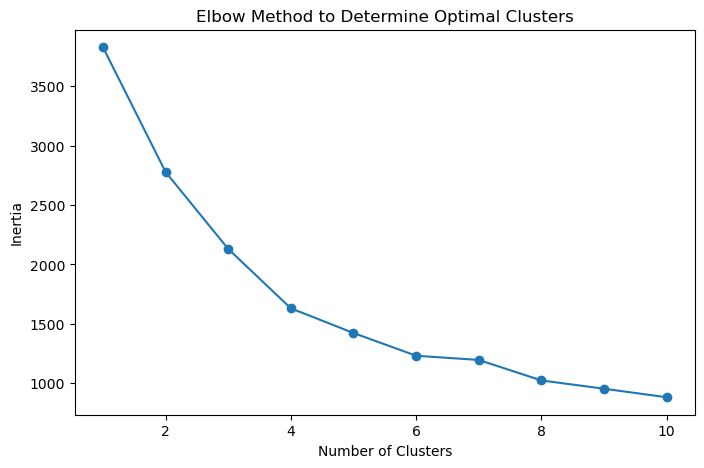

  Product_Name  Cluster
0    Whirlpool        0
1           LG        2
2    Whirlpool        0
3           LG        1
4        Haier        1
5    Whirlpool        0
6        Haier        1
7    Whirlpool        0
8    Whirlpool        1
9       Voltas        2


In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):  
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

print(df[['Product_Name', 'Cluster']].head(10))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = features_scaled 
y = df['Star_Ratings'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79


<h1 style="text-align: center;">SUPERVISED LEARNING</h1>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

      2 Star       0.50      0.03      0.05        38
      3 Star       0.73      0.99      0.84       105
      4 Star       1.00      1.00      1.00        29
      5 Star       1.00      0.75      0.86         8

    accuracy                           0.78       180
   macro avg       0.81      0.69      0.69       180
weighted avg       0.74      0.78      0.70       180



In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Performance:")
print(classification_report(y_test, y_pred))

SVM Performance:
              precision    recall  f1-score   support

      2 Star       0.00      0.00      0.00        38
      3 Star       0.73      1.00      0.85       105
      4 Star       1.00      1.00      1.00        29
      5 Star       1.00      1.00      1.00         8

    accuracy                           0.79       180
   macro avg       0.68      0.75      0.71       180
weighted avg       0.63      0.79      0.70       180



In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("k-NN Performance:")
print(classification_report(y_test, y_pred))

k-NN Performance:
              precision    recall  f1-score   support

      2 Star       0.54      0.34      0.42        38
      3 Star       0.78      0.90      0.84       105
      4 Star       1.00      0.97      0.98        29
      5 Star       0.88      0.88      0.88         8

    accuracy                           0.79       180
   macro avg       0.80      0.77      0.78       180
weighted avg       0.77      0.79      0.77       180



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred))

Random Forest Performance:
              precision    recall  f1-score   support

      2 Star       0.52      0.45      0.48        38
      3 Star       0.81      0.85      0.83       105
      4 Star       1.00      1.00      1.00        29
      5 Star       1.00      1.00      1.00         8

    accuracy                           0.79       180
   macro avg       0.83      0.82      0.83       180
weighted avg       0.79      0.79      0.79       180



In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train_encoded)

y_pred_encoded = xgb_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred))

XGBoost Performance:
              precision    recall  f1-score   support

      2 Star       0.48      0.37      0.42        38
      3 Star       0.79      0.86      0.82       105
      4 Star       1.00      1.00      1.00        29
      5 Star       1.00      1.00      1.00         8

    accuracy                           0.78       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.77      0.78      0.77       180



<h1 style="text-align: center;">HYPERPARAMETER TUNING</h1>

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],      
    'max_depth': [None, 10, 20, 30],    
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4]       
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\n")
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

accuracy = best_rf_model.score(X_test, y_test)
print(f"Test Set Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8242812742812742
Test Set Accuracy: 0.83
